## INTRODUZIONE
Il cervello umano è ciò che ispira l’architettura delle reti neurali. Le cellule del cervello umano, chiamate neuroni, formano una rete complessa e altamente interconnessa e si inviano segnali elettrici tra loro per aiutare gli esseri umani a elaborare le informazioni. Allo stesso modo, una rete neurale artificiale è costituita da neuroni artificiali che lavorano insieme per risolvere un problema. I neuroni artificiali sono moduli software, chiamati nodi, e le reti neurali artificiali sono programmi software o algoritmi che utilizzano essenzialmente sistemi informatici per risolvere calcoli matematici.
Le reti neurali sono costituite da neuroni, che a loro volta sono raggruppati in strati: ogni neurone di ogni strato è connesso a tutti i neuroni dello strato precedente. In ogni neurone verranno effettuate una serie di operazioni che, ottimizzando, faremo sì che la nostra rete impari. 
Questo lavoro consiste nel costruire una rete neurale che preveda la classificazione del test UTIs, delle infezioni delle vie urinarie. Le infezioni del tratto urinario possono essere analizzate analizzando un tratto urinario. L'urina viene esaminata al microscopio per identificare batteri o globuli bianchi, che indicano un'infezione. Il medico può anche seguire un sistema urinario. Questo test esamina l'urina per raccogliere e identificare batteri e infezioni che possono causare infezioni del tratto urinario.
L'insieme dei dati che utilizziamo è stato raccolto da una clinica locale nel Mindanao settentrionale, nelle Filippine, ed è compreso tra aprile 2020 e gennaio 2023.
Il set di dati è composto da 1436 righe × 16 colonne
* Age (l'età del paziente) Nota: alcuni pazienti hanno mesi, quindi l'età di questi pazienti viene preelaborata dividendola per cento) ad esempio, 8 MESI, 8/100 = 0,08
* Gender (Il sesso del paziente) Nota: maschio o femmina 
* Color (colore dell'urina)
* Transparency (trasparenza delle urine)
* Glucose (il glucosio è un tipo di zucchero e la sua presenza nelle urine può essere un indicatore importante di determinate condizioni di salute)
* Protein (la presenza di proteine nelle urine è uno dei parametri esaminati per valutare la funzionalità renale e rilevarne le potenzialità)
* pH (il livello del pH misura l'acidità o l'alcalinità delle urine)
* Specific Gravity (la gravità specifica dell'urina è una misura della concentrazione di particelle nell'urina rispetto all'acqua)
* WBC (White Blood Cells) Nota: noti anche come leucociti, i globuli bianchi sono una parte cruciale del sistema immunitario)
* RBC (Red Blood Cells) Nota: i globuli rossi sono responsabili del trasporto dell'ossigeno in tutto il corpo
* Epithelial Cells (le cellule epiteliali sono cellule che rivestono le superfici e le cavità del corpo, compreso il tratto urinario)
* Mucous Threads (i fili mucosi sono filamenti di muco che possono essere presenti nelle urine)
* Amorphous Urates (gli urati amorfi sono formazioni non cristalline nelle urine costituite da acido urico)
* Bacteria (presenza di batteri nelle urine)
* Diagnosis (UTI Diagnosis) NEGATIVE o POSITIVE

In [5]:
import pandas as pd
import numpy as np
archivo = 'C:/Users/2davi/OneDrive/Desktop/2 Anno/Statistica Per la Azienda(COZZUCOLI)/Progetto 2/urinalysis_tests.csv'
df = pd.read_csv(archivo, delimiter=',')
print(df.shape) 
df.drop(df.columns[0:1], axis=1, inplace=True)
df = df.dropna()
df.info()

(1436, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1435 non-null   float64
 1   Gender            1435 non-null   object 
 2   Color             1435 non-null   object 
 3   Transparency      1435 non-null   object 
 4   Glucose           1435 non-null   object 
 5   Protein           1435 non-null   object 
 6   pH                1435 non-null   float64
 7   Specific Gravity  1435 non-null   float64
 8   WBC               1435 non-null   object 
 9   RBC               1435 non-null   object 
 10  Epithelial Cells  1435 non-null   object 
 11  Mucous Threads    1435 non-null   object 
 12  Amorphous Urates  1435 non-null   object 
 13  Bacteria          1435 non-null   object 
 14  Diagnosis         1435 non-null   object 
dtypes: float64(3), object(12)
memory usage: 179.4+ KB


## PRE-PROCESSING DEI DATI
Il pre-processing dei dati si riferisce alla trasformazione dei dati grezzi in un formato più adatto e comprensibile per l'algoritmo. Questo processo include la gestione dei valori nulli, la normalizzazione delle variabili munerici, la codifica delle variabili categoriali e la gestione dei valori anomali. Per questo set di dati sono stati controllati i valori nulli e ne è stato ottenuto uno, per il quale è stata rimossa l'intera riga.
Con la funzione info() sono stati ottenuti i tipi di dati per ciascuna variabile nel set di dati. Abbiamo 3 variabili [Age, pH, Specific Gravity] che sono numeriche, mentre le restanti 12 variabili sono categoriali. [Gender, Transparency, Glucose, Protein, WBC, RBC, Epithelial Cells, Mucous Threads, Amorphous Urates, Bateria, Diagnosis]

In [6]:
df.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


Con la funzione describe() abbiamo ottenuto il minimo, il massimo, la media e altri valori delle variabili numeriche. Come avevamo accennato in precedenza,dobbiamo standardizzare i dati che saranno input nella nostra rete neurale. Per le variabili numeriche useremo normalizzazione min-max. Questa tecnica ridimensiona i valori dei dati in modo che rientrino in un intervallo specifico, ad esempio tra 0 e 1. Ciò si ottiene utilizzando la formula:
X_norma = (X - X_min) / (X_max - X_min)
Dove X è il valore originale, X_min è il valore minimo e X_max è il valore massimo.
La normalizzazione min-max è utile quando i dati hanno scale diverse e si desidera confrontare o mettere in relazione le variabili tra loro. Questa tecnica garantisce che tutti i dati siano nello stesso intervallo e impedisce che le variabili con valori più grandi dominino il modello.

In [7]:
df.describe()

,Age,pH,Specific Gravity
count,1435.000000,1435.000000,1435.000000
mean,27.213937,6.052962,1.015847
std,23.466950,0.598682,0.007287
min,0.010000,5.000000,1.005000
25%,6.000000,6.000000,1.010000
50%,23.000000,6.000000,1.015000
75%,45.000000,6.500000,1.020000
max,92.000000,8.000000,1.030000


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['pH'] = scaler.fit_transform(df[['pH']])
df['Specific Gravity'] = scaler.fit_transform(df[['Specific Gravity']])
df.describe()

,Age,pH,Specific Gravity
count,1435.000000,1435.000000,1435.000000
mean,0.295727,0.350987,0.433868
std,0.255103,0.199561,0.291481
min,0.000000,0.000000,0.000000
25%,0.065116,0.333333,0.200000
50%,0.249918,0.333333,0.400000
75%,0.489075,0.500000,0.600000
max,1.000000,1.000000,1.000000


Per trattare le variabili categoriali utilizzeremo il metodo di codifica chiamato One Hot Encoding. Questa strategia consiste nel creare una colonna binaria (che può contenere solo i valori 0 o 1) per ogni valore univoco esistente nella variabile categoriale che stiamo codificando, e contrassegnare con un 1 la colonna corrispondente al valore presente in ciascuna record, lasciando le altre colonne con un valore pari a 0.
Ma prima di convertire le variabili categoriali in dummy, verranno apportate modifiche pertinenti con l'obiettivo di ridurre al massimo le categorie possibili per ciascuna variabile. Uno svantaggio di questo metodo è che stiamo aumentando la dimensionalità del set di dati (ovvero, aumentando il numero di colonne o caratteristiche categoriche da cui addestrare il modello), il che può essere problematico se il numero di campioni disponibili non è sufficientemente elevato per addestrare la rete.
Per la variabile Color, abbiamo unito le categorie ['REDDISH', 'REDDISH YELLOW', 'LIGHT RED', 'BROWN'] nella categoria RED che in questo caso abbiamo una frequenza bassa per ogni categoria.

In [9]:
df['Color'] = df['Color'].replace(('REDDISH', 'REDDISH YELLOW', 'LIGHT RED', 'BROWN'), 'RED')
df.Color.value_counts()

Color
YELLOW          710
LIGHT YELLOW    341
DARK YELLOW     248
STRAW           116
AMBER            15
RED               5
Name: count, dtype: int64

In [10]:
df.Transparency.value_counts()

Transparency
CLEAR            1123
SLIGHTLY HAZY     172
HAZY              104
TURBID             20
CLOUDY             16
Name: count, dtype: int64

In [11]:
df.Glucose.value_counts()

Glucose
NEGATIVE    1348
2+            24
3+            23
1+            15
TRACE         13
4+            12
Name: count, dtype: int64

In [12]:
df.Protein.value_counts()

Protein
NEGATIVE    804
TRACE       491
1+           94
2+           41
3+            5
Name: count, dtype: int64

In [13]:
df['pH'].value_counts()

pH
0.333333    758
0.500000    305
0.000000    237
0.666667     96
0.833333     27
1.000000     12
Name: count, dtype: int64

Le variabili WBC e RBC si riferiscono rispettivamente alla conta dei globuli bianchi e rossi del paziente. Queste variabili come set singolo hanno 91 tipi di categorie che si riflettono in intervalli. [0-2, 1-3...]. La procedura adottata dall'autore originario del lavoro prevede la riduzione di 91 categorie a 13 divisioni che contengono parzialmente insiemi delle categorie originarie. Per ridurre, la nostra proposta è di ridurre a 9 categorie
I valori di queste colonne che sono indicati da un segno maggiore (">") come ">50" e ">100", indicando che il numero di leucociti o eritrociti supera 50 o 100 e, infine, alcuni punti di dati rappresentati come stringhe, inclusi "LOADED" e "TNTC" saranno rappresentato >250 che significa che sono non numerabile.

In [14]:
df.WBC.value_counts()

WBC
0-2      448
1-2      150
0-1      136
2-4      114
1-3      106
        ... 
10-16      1
48-55      1
7-8        1
15-22      1
8-11       1
Name: count, Length: 75, dtype: int64

In [15]:
df.RBC.value_counts()

RBC
0-2       617
0-1       312
1-2       123
1-3        87
2-4        72
0-3        49
3-5        27
4-6        24
>50        13
5-7        10
>100       10
8-10       10
18-20       6
13-15       5
2-3         5
10-12       5
1-5         4
6-8         4
LOADED      4
1-4         3
0-4         3
9-11        3
5-10        2
5-8         2
23-25       2
30-35       2
1-6         2
16-18       2
2-5         2
3-6         2
28-30       1
12-15       1
4-10        1
48-62       1
25-32       1
25-30       1
20-25       1
2-6         1
8-12        1
12-17       1
11-13       1
TNTC        1
22-24       1
0-0         1
85-87       1
36-38       1
20-22       1
18-21       1
18-25       1
18-22       1
9-12        1
6-14        1
38-40       1
Name: count, dtype: int64

In [16]:
from typing import Union
def custom_sort(value: str) -> Union[int, float]:
    APPROXIMATE_COUNT = 250
    if ">" in value:
        return int(value.replace(">", ""))
    elif value.isalpha():
        return APPROXIMATE_COUNT
    else:
        start, end = map(int, value.split('-'))
        return start + (end - start) / 2



sorted_values = [custom_sort(val) for val in df['WBC']]
sorted_values1 = [custom_sort(val1) for val1 in df['RBC']]

# Convertir la lista en una Serie de Pandas
sorted_series = pd.Series(sorted_values, name='Sorted_WBC')
sorted_series1 = pd.Series(sorted_values1, name='Sorted_RBC')
# Concatenar la nueva Serie al DataFrame
df = pd.concat([df, sorted_series, sorted_series1], axis=1)
df.isna().sum()
df= df.dropna()

Per apportare le modifiche pertinenti alle variabili WBC e RBC, viene applicata una funzione che restituisce ciascun valore medio di ciascun intervallo (91 categorie). Da questo valore creeremo le 9 nuove categorie che rappresenteranno i seguenti intervalli [0_5, 6_10, 11_15, 16_20, 21_30, 31_40, 41_50, >50, >100, >250]

In [17]:
# Definir los intervalos de los bins
bins = [0, 5, 10, 15, 20, 30, 50, 100, 249, 300]

# Etiquetas para los bins
labels = ['0_5', '6_10', '11_15', '16_20', '21_30', '31_50', '>50', '>100', '>250']

# Aplicar la función cut para dividir la variable en bins
df['WBC_S'] = pd.cut(df['Sorted_WBC'], bins=bins, labels=labels, right=False)
df['RBC_S'] = pd.cut(df['Sorted_RBC'], bins=bins, labels=labels, right=False)

In [18]:
df['WBC_S'].value_counts()

WBC_S
0_5      1110
6_10      153
11_15      54
16_20      35
>250       26
>50        23
21_30      21
31_50       8
>100        4
Name: count, dtype: int64

In [19]:
df['Epithelial Cells'].value_counts()

Epithelial Cells
RARE          740
FEW           347
MODERATE      188
PLENTY        121
OCCASIONAL     19
NONE SEEN      16
LOADED          3
Name: count, dtype: int64

In [20]:
df['Mucous Threads'].value_counts()

Mucous Threads
NONE SEEN     500
FEW           381
RARE          275
MODERATE      221
PLENTY         36
OCCASIONAL     21
Name: count, dtype: int64

In [21]:
df['Amorphous Urates'].value_counts()

Amorphous Urates
NONE SEEN     1282
FEW             72
RARE            42
MODERATE        19
PLENTY          11
OCCASIONAL       8
Name: count, dtype: int64

In [22]:
df.Bacteria.value_counts()

Bacteria
RARE          753
FEW           434
MODERATE      158
PLENTY         77
OCCASIONAL      8
LOADED          4
Name: count, dtype: int64

In [23]:
df.Diagnosis.value_counts()

Diagnosis
NEGATIVE    1353
POSITIVE      81
Name: count, dtype: int64

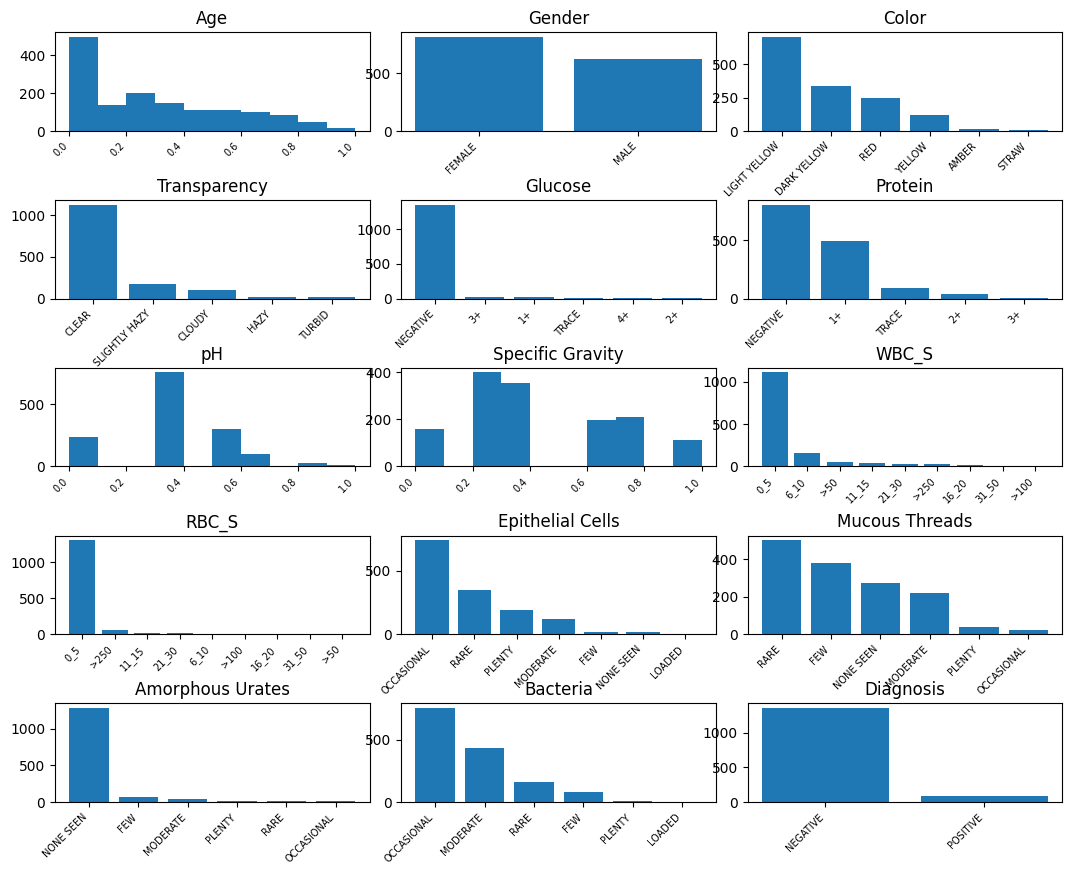

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))


# 1 Plot
plt.subplot(5, 3, 1)
plt.hist(df['Age'])
plt.title('Age')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 2 Plot
plt.subplot(5, 3, 2)
plt.bar(df['Gender'].unique(), df['Gender'].value_counts())
plt.title('Gender')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 3 Plot
plt.subplot(5, 3, 3)
plt.bar(df['Color'].unique(), df.Color.value_counts())
plt.title('Color')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 4 Plot
plt.subplot(5, 3, 4)
plt.bar(df['Transparency'].unique(), df.Transparency.value_counts())
plt.title('Transparency')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 5 Plot
plt.subplot(5, 3, 5)
plt.bar(df['Glucose'].unique(), df.Glucose.value_counts())
plt.title('Glucose')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 6 Plot
plt.subplot(5, 3, 6)
plt.bar(df['Protein'].unique(), df.Protein.value_counts())
plt.title('Protein')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 7 Plot
plt.subplot(5, 3, 7)
plt.hist(df['pH'])
plt.title('pH')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 8 Plot
plt.subplot(5, 3, 8)
plt.hist(df['Specific Gravity'])
plt.title('Specific Gravity')
plt.xticks(rotation=45, ha='right', fontsize=7)


# 9 Plot
plt.subplot(5, 3, 9)
plt.bar(df['WBC_S'].unique(), df['WBC_S'].value_counts())
plt.title('WBC_S')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 10 Plot
plt.subplot(5, 3, 10)
plt.bar(df['RBC_S'].unique(), df['RBC_S'].value_counts())
plt.title('RBC_S')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 11 Plot
plt.subplot(5, 3, 11)
plt.bar(df['Epithelial Cells'].unique(), df['Epithelial Cells'].value_counts())
plt.title('Epithelial Cells')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 12 Plot
plt.subplot(5, 3, 12)
plt.bar(df['Mucous Threads'].unique(), df['Mucous Threads'].value_counts())
plt.title('Mucous Threads')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 13 Plot
plt.subplot(5, 3, 13)
plt.bar(df['Amorphous Urates'].unique(), df['Amorphous Urates'].value_counts())
plt.title('Amorphous Urates')
plt.xticks(rotation=45, ha='right', fontsize=7)

# 14 Plot
plt.subplot(5, 3, 14)
plt.bar(df['Bacteria'].unique(), df['Bacteria'].value_counts())
plt.title('Bacteria')
plt.xticks(rotation=45, ha='right', fontsize=7)


# 15 Plot
plt.subplot(5, 3, 15)
plt.bar(df['Diagnosis'].unique(), df['Diagnosis'].value_counts())
plt.title('Diagnosis')
plt.xticks(rotation=45, ha='right', fontsize=7)


plt.subplots_adjust(hspace=.7)
plt.subplots_adjust(wspace=.10)

plt.show()

Definiamo una piccola funzione che restituisce la conversione delle variabili categoriali in variabili binarie, questo con l'obiettivo di ottenere le variabili trasformate che serviranno come input alla rete neurale.

In [25]:
def crear_variables_dummy_codificadas(dataframe, columnas_categoricas):
    df_codificado = dataframe.copy()
    for columna in columnas_categoricas:
        categorias = dataframe[columna].unique()
        for categoria in categorias:
            nombre_columna_dummy = f"{columna}_{categoria}"
            df_codificado[nombre_columna_dummy] = (dataframe[columna] == categoria).astype(int)
        df_codificado.drop(columna, axis=1, inplace=True)
    return df_codificado

columnas_categoricas=['Gender', 'Color','Transparency', 'Glucose', 'Protein', 'WBC_S', 'RBC_S', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria']
df_dummy = crear_variables_dummy_codificadas(df, columnas_categoricas)
#print(df_dummy)

In [26]:
df_dummy['Diagnosi'] = df_dummy['Diagnosis'].map({'NEGATIVE': 0, 'POSITIVE': 1})

In [27]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1434
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1434 non-null   float64
 1   pH                           1434 non-null   float64
 2   Specific Gravity             1434 non-null   float64
 3   WBC                          1434 non-null   object 
 4   RBC                          1434 non-null   object 
 5   Diagnosis                    1434 non-null   object 
 6   Sorted_WBC                   1434 non-null   float64
 7   Sorted_RBC                   1434 non-null   float64
 8   Gender_FEMALE                1434 non-null   int32  
 9   Gender_MALE                  1434 non-null   int32  
 10  Color_LIGHT YELLOW           1434 non-null   int32  
 11  Color_DARK YELLOW            1434 non-null   int32  
 12  Color_RED                    1434 non-null   int32  
 13  Color_YELLOW           

Eliminamos las columnas que....

In [28]:
df_dummy = df_dummy.drop(['WBC', 'RBC', 'Sorted_WBC', 'Sorted_RBC', 'Diagnosis'], axis=1)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1434
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1434 non-null   float64
 1   pH                           1434 non-null   float64
 2   Specific Gravity             1434 non-null   float64
 3   Gender_FEMALE                1434 non-null   int32  
 4   Gender_MALE                  1434 non-null   int32  
 5   Color_LIGHT YELLOW           1434 non-null   int32  
 6   Color_DARK YELLOW            1434 non-null   int32  
 7   Color_RED                    1434 non-null   int32  
 8   Color_YELLOW                 1434 non-null   int32  
 9   Color_AMBER                  1434 non-null   int32  
 10  Color_STRAW                  1434 non-null   int32  
 11  Transparency_CLEAR           1434 non-null   int32  
 12  Transparency_SLIGHTLY HAZY   1434 non-null   int32  
 13  Transparency_CLOUDY    

## COSTRUZIONE DELLA RETE NEURALE
Prima di costruire e addestrare una rete neurale, è fondamentale preparare adeguatamente i dati di input e di output. Eliminare i dati errati, duplicati o mancanti. Modificare i dati in modo che abbiano una scala simile per facilitare il processo di ottimizzazione. Convertire le variabili categoriali in un formato numerico adatto al modello. Avevamo precedentemente commentato questa fase con le modifiche apportate. Dopo, i dati vengono quindi generalmente suddivisi in set di training, validation e test; In questo caso dividiamo il dataset solo in train_set e test_set perche ci ritroviamo con un data set sbilanciato e poche unità che rappresentano la classe positiva.
Viene definita l'architettura della rete neurale, compreso il numero di strati, il numero di neuroni in ogni strato, le funzioni di attivazione, in questo caso utilizziamo il RELU per gli strati intermedi e per l'output utilizziamo il Sigmoide. Questo viene fatto utilizzando le librerie TensorFlow e Keras. La funzione di attivazione ReLu applica una trasformazione non lineare molto semplice, attivando il neurone solo se l'input è superiore a zero. Mentre il valore di ingresso è inferiore a zero, il valore di uscita è zero, ma quando è superiore a zero, il valore di uscita aumenta linearmente con il valore di ingresso. La funzione sigmoide trasforma i valori nell'intervallo (-inf, +inf) in valori nell'intervallo (0, 1). Questa è ancora la funzione spesso utilizzata nei neuroni nello strato di output dei modelli di classificazione binaria, poiché il suo output può essere interpretato come probabilità.

Il processo di addestramento di una rete neurale consiste nell'aggiustare il valore dei pesi e dei bias in modo tale che le previsioni generate abbiano il minor errore possibile. Grazie a ciò, il modello è in grado di identificare quali predittori hanno la maggiore influenza e come sono correlati tra loro e con la variabile di risposta. Avvia la rete con valori casuali dei pesi e del bias. Per ogni osservazione di addestramento (X, y), calcola l'errore commesso dalla rete quando effettua le sue previsioni. Media degli errori di tutte le osservazioni. Identificare la responsabilità che ciascun peso e bias ha avuto nell'errore di previsione. Modificare leggermente i pesi e il bias della rete (proporzionali alla sua responsabilità per l'errore) nella giusta direzione in modo da ridurre l'errore. Ripeti i passaggi precedenti finché la rete non è abbastanza buona. Tutto questo attraverso della combinazione di più metodi matematici, in particolare l’algoritmo di backpropagation e l’ottimizzazione della discesa del gradiente.

Il codice seguente importa diverse classi e funzioni dalle librerie tensorflow.keras e sklearn.model_selection. 
* Da tensorflow.keras.models import Sequential: importa la classe Sequential da tensorflow.keras.models. Sequenziale è un modello di rete neurale sequenziale, il che significa che i livelli vengono aggiunti in sequenza uno dopo l'altro.
* Da tensorflow.keras.layers import Dense, Input, Concatenate, Embedding: importa diversi livelli che possono essere utilizzati per creare modelli di rete neurale con tensorflow.keras. I layer Denso costruisce uno strato di rete neurale completamente connesso e i layer Input costruisce un livello di input utilizzato per specificare la dimensione dei dati di input.
* Da sklearn.model_selection import train_test_split: importa la funzione train_test_split da sklearn.model_selection. train_test_split viene utilizzato per suddividere i dati in set di training e test, utile per valutare le prestazioni del modello.
In sintesi, questo codice prepara l'ambiente per la creazione e l'addestramento di modelli di rete neurale utilizzando TensorFlow e Keras e anche per la suddivisione dei set di dati in set di training e test utilizzando scikit-learn.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.model_selection import train_test_split

Selezioniamo tutte le colonne di un DataFrame df_dummy elaborato, tranne la colonna 'Diagnosi', che è la nostra variabile target, che sarà l'input 
della rete neurale che salviamo nella variabile X. Quindi selezioniamo solo la colonna 'Diagnosi' e lo salviamo nella variabile y.

In [30]:
X = df_dummy.drop('Diagnosi', axis=1)
y = df_dummy['Diagnosi']

Utilizziamo quindi la funzione train_test_split di scikit-learn per dividere i set di dati X e y in set di training e test. 
Ecco una descrizione di ciò che fa ciascun argomento nella funzione train_test_split:

* X: Insieme di caratteristiche/ variabili indipendenti.
* y: set di etichette (valore della variabile target).
* test_size: proporzione del set di dati da utilizzare come set di test. In questo caso è impostato su 0,3, il che significa che il 30% del 
set di dati verrà utilizzato come set di test.
* random_state: seme per garantire la riproducibilità della suddivisione. Impostandolo ti assicuri di ottenere la stessa suddivisione ogni 
volta che esegui il codice.
Il risultato della funzione train_test_split è costituito da quattro set di dati: X_train, X_test, y_train e y_test. Questi rappresentano 
i dati delle funzionalità e delle etichette rispettivamente per il set di training e il set di test. 

In [31]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
len(X_train)

1003

Utilizziamo un modello sequenziale, in cui sono definiti i seguenti attributi:
* Input(shape=(X_train.shape[1],)): Definisce il livello di input del modello, che in questo caso rappresenta il numero di feature nel
variabili indipendenti ottenute 70 salvate nel set di addestramento X_train. Ciò consente alla rete neurale di accettare dati di input 
con la stessa forma dei dati di addestramento.
Ora attiviamo due livelli nascosti interconnessi:
* Dense(64, attivazione='relu'): aggiungiamo uno strato densamente connesso con 64 neuroni alla rete neurale. All'uscita di questo livello 
viene applicata la funzione di attivazione 'relu' (unità lineare rettificata). Lo strato denso è completamente connesso ai neuroni dello 
strato precedente.
* Dense(32, attivazione='relu'): aggiungiamo un altro strato densamente connesso con 32 neuroni alla rete neurale. Come il livello precedente, 
utilizza la funzione di attivazione "relu".
Per gli output si attiva un nodo:
* Dense(1, attivazione='sigmoid'): aggiungiamo lo strato di output della rete neurale. Questo è uno strato denso con un singolo neurone, poiché 
il problema è di classificazione binaria (l'output è 0 o 1). La funzione di attivazione "sigmoide" viene qui utilizzata 
per produrre un output compreso tra 0 e 1, che viene interpretato come la probabilità che l'input appartenga alla classe positiva.

In [33]:
# Definición del modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

Il modello viene compilato utilizzando l'ottimizzatore "rmsprop". Il RMSprop (Root Mean Square Propagation) è un algoritmo di ottimizzazione comunemente utilizzato nell'allenamento delle reti neuronali. A differenza della tradizionale discesa del gradiente Stocastico, RMSprop adatta il compito di apprendimento a ciascun parametro individualmente, in modo da aiutare a convergere più rapidamente su problemi con gradienti di diversa natura. Anche se RMSprop non richiede un compito di apprendimento esplicito, è anche possibile controllarlo indirettamente tramite la regolazione di altri iperparametri. Uno di questi iperparametri è il "learning_rate" (learning_rate) che influenza l'entità delle regolazioni del peso durante . Il "tasso di apprendimento" iniziale predefinito nell'ottimizzatore è 0.001.
Il tasso di apprendimento o learning_rate stabilisce la velocità con cui i parametri di un modello possono cambiare man mano che viene ottimizzato (appreso). Questo iperparametro è uno dei più complicati da stabilire, poiché dipende fortemente dai dati e interagisce con il resto degli iperparametri. Se il tasso di apprendimento è molto elevato, il processo di ottimizzazione può passare da una regione all’altra senza che il modello sia in grado di apprendere. Se, invece, il tasso di apprendimento è molto basso, il processo formativo potrebbe richiedere troppo tempo e non essere completato.
La funzione di perdita (loss function) è specificata come "binary_crossentropy", che viene comunemente utilizzata per problemi di classificazione binaria. La metrica di valutazione è specificata come "accuratezza", che calcolerà l'accuratezza del modello durante l'addestramento e la valutazione.
Il modello viene addestrato utilizzando i dati di addestramento. Valutiamo il modello utilizzando i dati di test X_test e y_test.
La perdita e l'accuratezza del modello sui dati del test vengono calcolate e visualizzate. Le previsioni vengono effettuate utilizzando il 
modello addestrato sui dati del test X_test.

In [44]:
# Compilación del modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Predicciones
predictions = model.predict(X_test)

Epoch 1/50


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.9420 - val_loss: 0.5940
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0169 - val_accuracy: 0.9490 - val_loss: 0.5806
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9397 - val_loss: 0.6220
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0221 - val_accuracy: 0.9443 - val_loss: 0.6119
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9911 - loss: 0.0178 - val_accuracy: 0.9443 - val_loss: 0.5921
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0170 - val_accuracy: 0.9420 - val_loss: 0.6196
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9327 - val_loss: 0.5794
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0164 - val_accuracy: 0.9466 - val_loss: 0.6051
Epo

La funzione di perdita (loss function) è una parte fondamentale del processo di addestramento del modello di rete neurale. Questa funzione valuta le prestazioni del modello ad ogni iterazione durante l'addestramento, confrontando le previsioni del modello con i valori effettivi dei dati di addestramento. L'obiettivo durante l'addestramento è ridurre al minimo la funzione di perdita, il che significa che il modello fa previsioni più vicine ai valori effettivi. In questo caso, la funzione di perdita utilizzata è la "Binary Crossentropy". Questa funzione di perdita è comunemente utilizzata nei problemi di classificazione binaria, quando il modello deve prevedere tra due classi mutuamente esclusive, come "sì" o "no", "positivo" o "negativo". La funzione di perdita di Binary Crossentropy calcola la perdita tra le etichette vere e le previsioni del modello per ciascun esempio di training. La crossentropia binaria penalizza pesantemente le previsioni errate. Se l'etichetta vera è 1 e la previsione del modello è vicina a 0, o se l'etichetta vera è 0 e la previsione del modello è vicina a 1, la perdita sarà elevata. D’altra parte, se la previsione del modello è vicina all’etichetta reale, la perdita sarà bassa. Nell'addestramento del modello, l'obiettivo è ridurre al minimo la Binary Crossentropy, il che significa che il modello sta imparando a fare previsioni che si adattino il più fedelmente possibile alle etichette reali. 

## PLOTING
Come vediamo nell'output seguente, la funzione di perdita nel set di dati di training diminuisce all'aumentare del numero di epoche, che è il comportamento desiderato, inizia con un valore di .4224 e termina con una perdita di .0269. Questo comportamento non è lo stesso quando si utilizza il set di dati di test (test_set), che all'aumentare delle epoche aumenta la funzione di perdita.
Per quanto riguarda l'accuratezza, notiamo che nel training set ottiene un valore del 99,5% nelle ultime epoche, ma nel test set questa accuratezza si riduce al 94,2%. Potremmo cadere in un eccesso di adattamento, overfitting

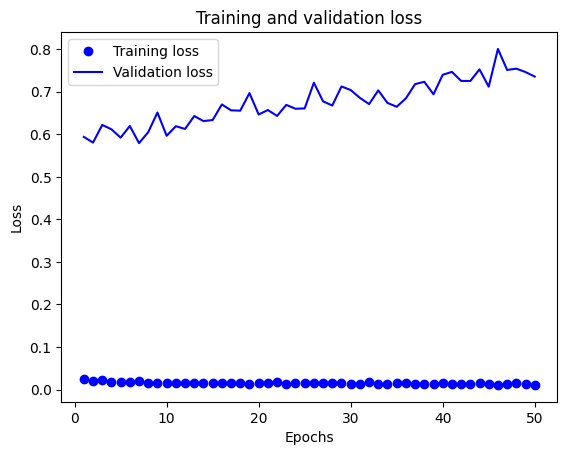

In [45]:
plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

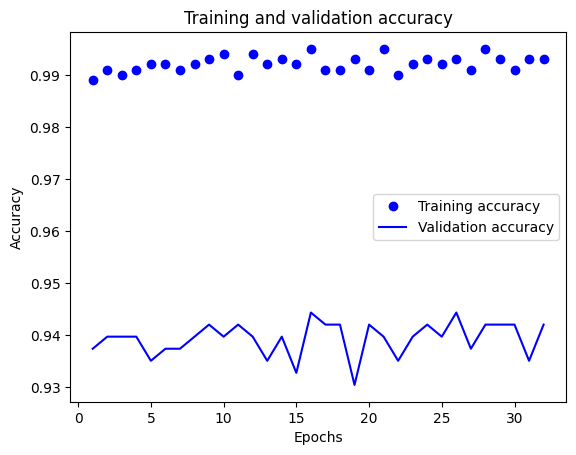

In [43]:
plt.clf() #Clears the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Per una migliore comprensione dell'accuratezza ottenuta, includiamo gli altri punteggi:

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Realizar predicciones
predictions = model.predict(X_test)

# Convertir las predicciones a etiquetas binarias
predictions_binary = (predictions > 0.5).astype(int)

# Calcular métricas
accuracy = accuracy_score(y_test, predictions_binary)
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)
conf_matrix = confusion_matrix(y_test, predictions_binary)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
roc_auc = roc_auc_score(y_test, predictions)

# Imprimir las métricas
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}, Specificity: {specificity}, ROC AUC: {roc_auc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.9396751740139211, Precision: 0.6428571428571429, Recall: 0.3, F1-score: 0.4090909090909091, Specificity: 0.9875311720698254, ROC AUC: 0.7195344970906069


## CONCLUSIONE
Come puoi vedere l'accuratezza ottenuta è pari a circa il 94,77%, bisogna precisare che questa accuratezza può variare in base al numero di volte in cui si ruota il codice. Rispetto all'articolo a cui abbiamo fatto riferimento in precedenza, abbiamo aggiunto i risultati ottenuti per la valutazione.
L'autore afferma che il modello MLP (Perceptron multistrato) si distingue come il miglior classificatore tra gli altri modelli con una accuratezza del 92,06% tenendo conto degli altri attributi,	Precision, Recall, F1-Score, Specificity e AUC-ROC.L'autore prosegue dicendo che inoltre, Random Forest e XGBoost possono avere un punteggio di accuratezza importante, ma esiste una disparità tra Precision, Recall, F1-Score, Specificity,  AUC-ROC, che porta a un punteggio basso dal MLP. Questo è un problema comune soprattutto quando si ha a che fare con dati sbilanciati, in questo caso i valori positivi sono la classe minoritaria. I risultati ottenuti sono abbastanza simili a quelli ottenuti dall'autore del paper, con accuratezza simile, non tanto per gli altri parametri ma accettabili. Possiamo aggiungere che il pre-processing iniziale dei dati in questo lavoro è diversa da quella effettuata dall'autore dell'articolo. Nonostante ciò, il modello ottiene un accuratezza elevata, abbastanza simile a quelli ottenuti nella ricerca originale.

## Modifica de la rete costruita
Gli iperparametri della rete modificabili cercano la soluzione migliore ed evitano l'overfitting. I parametri maggiormente modificati sono il learning_rate di cui abbiamo discusso in precedenza, il parametro epochs, il parametro batch_size e l'ottimizzatore. Possiamo anche includere la struttura della rete, eliminando nodi e strai, oppure aggiungendo ma l'architettura implementata ottiene buoni risultati. I parametri su cui non ci concentreremo sono epochs, learning_rate e batch_size.

Il parametro "epochs" nel contesto dell'addestramento dei modelli di rete neurale si riferisce al numero di volte in cui il modello vedrà l'intero set di dati durante il processo di addestramento. Ogni iterazione dell'intero set di dati è nota come "epochs".
Durante ogni epochs, il modello adegua i propri pesi attraverso il processo di backpropagation dell'errore, in cui i gradienti vengono calcolati rispetto alla funzione di perdita e utilizzati per aggiornare i parametri del modello (pesi e bias) attraverso un algoritmo di ottimizzazione, come la discesa stocastica del gradiente ( SGD), Adam e RMSprop.
Il numero di epoche è un iperparametro che viene ottimizzato durante l'addestramento del modello e può influire in modo significativo sulle prestazioni del modello. Se vengono utilizzate troppe epoche, esiste il rischio di overfitting, ovvero il modello si adatta eccessivamente ai dati di addestramento e non si generalizza bene ai nuovi dati. D'altra parte, se vengono utilizzate troppo poche epoche, il modello potrebbe non apprendere abbastanza e ottenere prestazioni scadenti.
Pertanto, il valore delle epoche viene tipicamente scelto valutando le prestazioni del modello su un set di validazione durante l'addestramento con valori diversi di questo parametro. Questo viene fatto per trovare il giusto equilibrio tra adattamento del modello e generalizzabilità.

Il parametro batch_size nel contesto dell'addestramento dei modelli di rete neurale si riferisce al numero di esempi di addestramento utilizzati in un'iterazione per calcolare il gradiente e aggiornare i pesi del modello.
Durante il processo di addestramento, i dati di addestramento vengono divisi in batch e il modello viene addestrato utilizzando un batch alla volta. Dopo aver elaborato una serie completa di esempi di addestramento, il gradiente della funzione di perdita viene calcolato rispetto ai pesi del modello e i pesi vengono aggiornati utilizzando un algoritmo di ottimizzazione, come la discesa del gradiente stocastico (SGD), Adam e RMSprop.
La dimensione del batch (batch_size) è un iperparametro che viene ottimizzato durante il training del modello e può influire sulle prestazioni e sulla convergenza del modello. Alcuni valori comuni per la dimensione del lotto sono solitamente compresi tra 32, 64, 128 o 256, ma non esiste una regola fissa e potrebbe essere necessario sperimentare valori diversi per trovare quello più adatto al tuo caso. problema specifico.

Anche altra funzione per evitare l'overfitting è la funzione Dropout che è una tecnica di regolarizzazione comunemente utilizzata nei neuroni per evitare il sobreajuste. In questo caso, il parametro 0.3 indica la tasa de abbandono (tasso di abbandono), che è la frazione delle unità del capa di ingresso che se dejan fuera dal rosso in ogni aggiornamento del passo hacia adelante (passaggio in avanti) durante l'allenamento . In altre parole, il 30% delle unità viene temporaneamente lasciato fuori dal rosso durante l'allenamento, il che significa che i suoi contributi alle attivazioni del capitolo successivo si stabilizzeranno a zero. Questo aiuta a prevenire il sobreajuste al desalentare la cooperazione eccessiva tra i neuroni, che conduce ad un rosso più robusto e generalizzabile. Durante la valutazione o l'inferenza, tutte le unità vengono utilizzate poiché il Dropout non viene applicato in questo momento.




In [38]:
from keras.optimizers import RMSprop, Adam
model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.3), 
    Dense(1, activation='sigmoid')
])
#Definir el valor de la tasa de aprendizaje
learning_rate = 0.001  
# Crear un objeto optimizador RMSprop con la tasa de aprendizaje especificada
optimizer = Adam(learning_rate=learning_rate)

# Compilación del modelo
model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_1=model_1.fit(X_train, y_train, epochs=15, batch_size=40, validation_data=(X_test, y_test))

# Evaluación del modelo
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Predicciones
predictions_1 = model_1.predict(X_test)

Epoch 1/15


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8383 - loss: 0.5286 - val_accuracy: 0.9304 - val_loss: 0.3320
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9502 - loss: 0.2748 - val_accuracy: 0.9304 - val_loss: 0.2384
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9551 - loss: 0.1909 - val_accuracy: 0.9304 - val_loss: 0.2326
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.1979 - val_accuracy: 0.9304 - val_loss: 0.2287
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9490 - loss: 0.2116 - val_accuracy: 0.9304 - val_loss: 0.2218
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9482 - loss: 0.1775 - val_accuracy: 0.9304 - val_loss: 0.2154
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9451 - loss: 0.1665 - val_accuracy: 0.9304 - val_loss: 0.2107
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1311 - val_accuracy: 0.9304 - val_loss: 0.2064
Ep

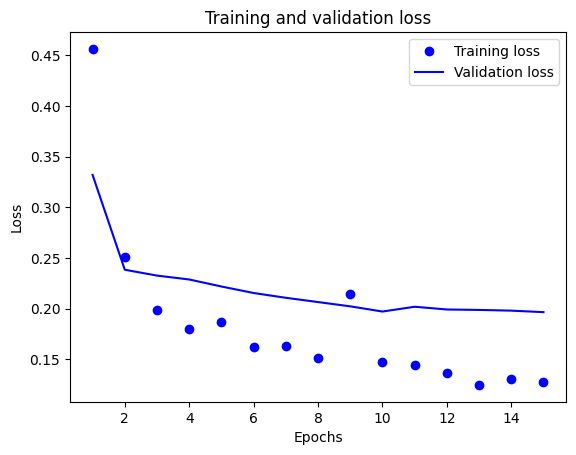

In [39]:
plt.clf()
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Come vediamo, la rete precedente è stata modificata nei parametri epochs=15, batch_size=40. Vedendo graficamente la funzione di perdita del modello 
precedente, possiamo dedurre che dopo di 10 epoche si verifica un overfitting dei dati e qui la funzione di perdita inizia a crescere. L'accuratezza di 93.8% diminuisce rispetto alla precedente, ma è comunque accettabile

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Realizar predicciones
predictions1 = model.predict(X_test)

# Convertir las predicciones a etiquetas binarias
predictions_binary1 = (predictions1 > 0.5).astype(int)

# Calcular métricas
accuracy1 = accuracy_score(y_test, predictions_binary1)
precision1 = precision_score(y_test, predictions_binary1)
recall1 = recall_score(y_test, predictions_binary1)
f1_ = f1_score(y_test, predictions_binary1)
conf_matrix1 = confusion_matrix(y_test, predictions_binary1)
specificity1 = conf_matrix1[0, 0] / (conf_matrix1[0, 0] + conf_matrix1[0, 1])
roc_auc1 = roc_auc_score(y_test, predictions1)

# Imprimir las métricas
print(f"Accuracy: {accuracy1}, Precision: {precision1}, Recall: {recall1}, F1-score: {f1_}, Specificity: {specificity1}, ROC AUC: {roc_auc1}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.9396751740139211, Precision: 0.6428571428571429, Recall: 0.3, F1-score: 0.4090909090909091, Specificity: 0.9875311720698254, ROC AUC: 0.7195344970906069
